# Dataset Understanding

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import string

df = pd.read_csv('7282_1.csv')

In [3]:
print(df.head(10))

                  address categories      city country   latitude  longitude  \
0  Riviera San Nicol 11/a     Hotels  Mableton      US  45.421611  12.376187   
1  Riviera San Nicol 11/a     Hotels  Mableton      US  45.421611  12.376187   
2  Riviera San Nicol 11/a     Hotels  Mableton      US  45.421611  12.376187   
3  Riviera San Nicol 11/a     Hotels  Mableton      US  45.421611  12.376187   
4  Riviera San Nicol 11/a     Hotels  Mableton      US  45.421611  12.376187   
5  Riviera San Nicol 11/a     Hotels  Mableton      US  45.421611  12.376187   
6  Riviera San Nicol 11/a     Hotels  Mableton      US  45.421611  12.376187   
7  Riviera San Nicol 11/a     Hotels  Mableton      US  45.421611  12.376187   
8  Riviera San Nicol 11/a     Hotels  Mableton      US  45.421611  12.376187   
9  Riviera San Nicol 11/a     Hotels  Mableton      US  45.421611  12.376187   

                 name postalCode province          reviews.date  \
0  Hotel Russo Palace      30126       GA  2013-09-2

In [4]:
print(df.columns)

Index(['address', 'categories', 'city', 'country', 'latitude', 'longitude',
       'name', 'postalCode', 'province', 'reviews.date', 'reviews.dateAdded',
       'reviews.doRecommend', 'reviews.id', 'reviews.rating', 'reviews.text',
       'reviews.title', 'reviews.userCity', 'reviews.username',
       'reviews.userProvince'],
      dtype='object')


In [5]:
print(df.isnull().sum())

address                     0
categories                  0
city                        0
country                     0
latitude                   86
longitude                  86
name                        0
postalCode                 55
province                    0
reviews.date              259
reviews.dateAdded           0
reviews.doRecommend     35912
reviews.id              35912
reviews.rating            862
reviews.text               22
reviews.title            1622
reviews.userCity        19649
reviews.username           43
reviews.userProvince    18394
dtype: int64


In [6]:
for column in df.columns:
    unique_values = df[column].nunique()
    print("{:<30}{}".format(column, unique_values))


address                       999
categories                    396
city                          761
country                       1
latitude                      982
longitude                     983
name                          879
postalCode                    911
province                      287
reviews.date                  3009
reviews.dateAdded             1029
reviews.doRecommend           0
reviews.id                    0
reviews.rating                43
reviews.text                  34397
reviews.title                 21961
reviews.userCity              2897
reviews.username              15492
reviews.userProvince          648


In [7]:
df.dtypes

address                  object
categories               object
city                     object
country                  object
latitude                float64
longitude               float64
name                     object
postalCode               object
province                 object
reviews.date             object
reviews.dateAdded        object
reviews.doRecommend     float64
reviews.id              float64
reviews.rating          float64
reviews.text             object
reviews.title            object
reviews.userCity         object
reviews.username         object
reviews.userProvince     object
dtype: object

# Data Cleaning

In [8]:
#All of the column below does not contribute to the classificatin of sentiment analysis, thus we can drop them
df = df.drop(['address','latitude','longitude', 'postalCode','reviews.date','reviews.dateAdded','reviews.userCity','reviews.userProvince','categories','city','country','province','reviews.doRecommend','reviews.id','reviews.title'], axis='columns')
df

,name,reviews.rating,reviews.text,reviews.username
0,Hotel Russo Palace,4.0,Pleasant 10 min walk along the sea front to th...,Russ (kent)
1,Hotel Russo Palace,5.0,Really lovely hotel. Stayed on the very top fl...,A Traveler
2,Hotel Russo Palace,5.0,Ett mycket bra hotell. Det som drog ner betyge...,Maud
3,Hotel Russo Palace,5.0,We stayed here for four nights in October. The...,Julie
4,Hotel Russo Palace,5.0,We stayed here for four nights in October. The...,sungchul
...,...,...,...,...
35907,Elk Springs Resort,5.0,Best of the Best!!!! My family and I stayed in...,Chelsa K.
35908,Elk Springs Resort,5.0,Amazing Vacation in Beautiful Cabin We stayed ...,Heather D.
35909,Elk Springs Resort,5.0,My husband and I stayed at Tree Tops which is ...,Carol W.
35910,Extended Stay America Grand Rapids - Kentwood,0.0,to share your opinion of this businesswith YP ...,write a review


In [9]:
df.rename(columns = {'reviews.rating':'ratings', 'reviews.text':'reviews','reviews.username':'username'}, inplace = True)

In [10]:
# Iterate through each row in the "reviews" column and strip the text
for idx, row in df.iterrows():
    # Check if the value is NaN
    if isinstance(row['reviews'], str):
        stripped_text = row['reviews'].strip()
        df.at[idx, 'reviews'] = stripped_text
    else:
        # Handle NaN values, you can choose to ignore, replace, or do something else
        df.at[idx, 'reviews'] = np.nan  # For example, setting NaN again

# Display the updated DataFrame
print(df)


                                                name  ratings  \
0                                 Hotel Russo Palace      4.0   
1                                 Hotel Russo Palace      5.0   
2                                 Hotel Russo Palace      5.0   
3                                 Hotel Russo Palace      5.0   
4                                 Hotel Russo Palace      5.0   
...                                              ...      ...   
35907                             Elk Springs Resort      5.0   
35908                             Elk Springs Resort      5.0   
35909                             Elk Springs Resort      5.0   
35910  Extended Stay America Grand Rapids - Kentwood      0.0   
35911  Extended Stay America Grand Rapids - Kentwood      0.0   

                                                 reviews        username  
0      Pleasant 10 min walk along the sea front to th...     Russ (kent)  
1      Really lovely hotel. Stayed on the very top fl...      A Trave

In [11]:
df.dropna(subset=['ratings'], inplace=True)
df.dropna(subset=['reviews'], inplace=True)

df.shape


(35028, 4)

In [12]:
df.drop_duplicates(subset=['username'])
df

,name,ratings,reviews,username
0,Hotel Russo Palace,4.0,Pleasant 10 min walk along the sea front to th...,Russ (kent)
1,Hotel Russo Palace,5.0,Really lovely hotel. Stayed on the very top fl...,A Traveler
2,Hotel Russo Palace,5.0,Ett mycket bra hotell. Det som drog ner betyge...,Maud
3,Hotel Russo Palace,5.0,We stayed here for four nights in October. The...,Julie
4,Hotel Russo Palace,5.0,We stayed here for four nights in October. The...,sungchul
...,...,...,...,...
35907,Elk Springs Resort,5.0,Best of the Best!!!! My family and I stayed in...,Chelsa K.
35908,Elk Springs Resort,5.0,Amazing Vacation in Beautiful Cabin We stayed ...,Heather D.
35909,Elk Springs Resort,5.0,My husband and I stayed at Tree Tops which is ...,Carol W.
35910,Extended Stay America Grand Rapids - Kentwood,0.0,to share your opinion of this businesswith YP ...,write a review


<Axes: ylabel='Frequency'>

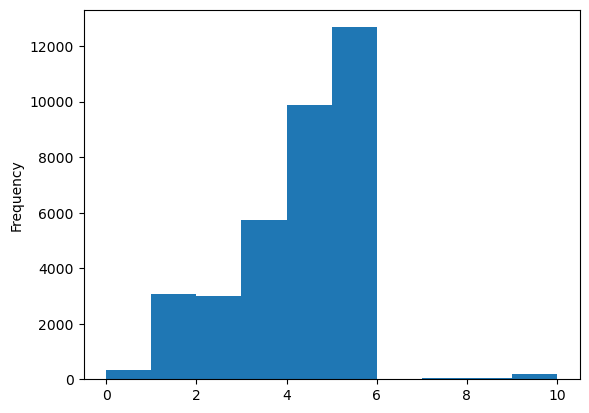

In [13]:
df['ratings'].plot(kind='hist')

In [14]:
filtered_values = df.loc[df['ratings'] > 5, 'ratings']

# Divide the filtered values by 2
filtered_values_divided = filtered_values / 2

# Update the original DataFrame with the new values
df.loc[df['ratings'] > 5, 'ratings'] = filtered_values_divided

In [15]:
df.loc[(df['ratings'] >= 4.5), 'ratings'] = 5.0

df.loc[(df['ratings'] >= 3.5) & (df['ratings'] < 4.5), 'ratings'] = 4.0

df.loc[(df['ratings'] >= 2.5) & (df['ratings'] < 3.5), 'ratings'] = 3.0

df.loc[(df['ratings'] >= 1.5) & (df['ratings'] < 2.5), 'ratings'] = 2.0

df.loc[(df['ratings'] >= 0.5) & (df['ratings'] < 1.5), 'ratings'] = 1.0

df.loc[(df['ratings'] < 0.5), 'ratings'] = 0.0

In [16]:
df = df[df['ratings'] != 0.0]

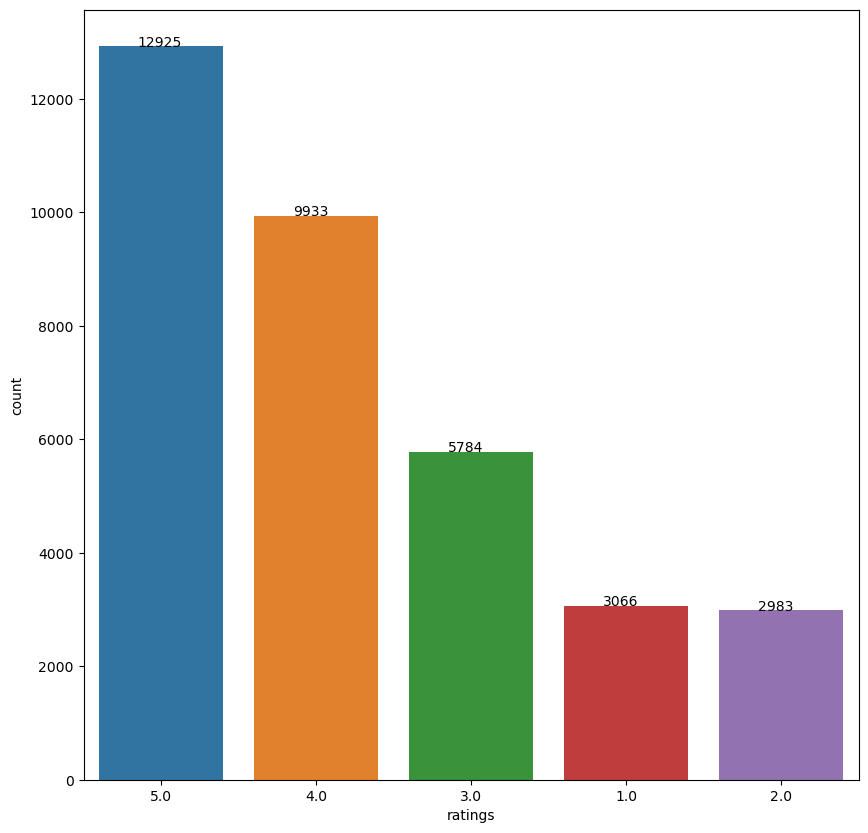

In [17]:
plt.figure(figsize=(10, 10))

ax = sns.countplot(x=df['ratings'], data=df, order = df["ratings"].value_counts().index)
for p, label in zip(ax.patches, df["ratings"].value_counts()):
    ax.annotate(label, (p.get_x()+0.25, p.get_height()+0.5))

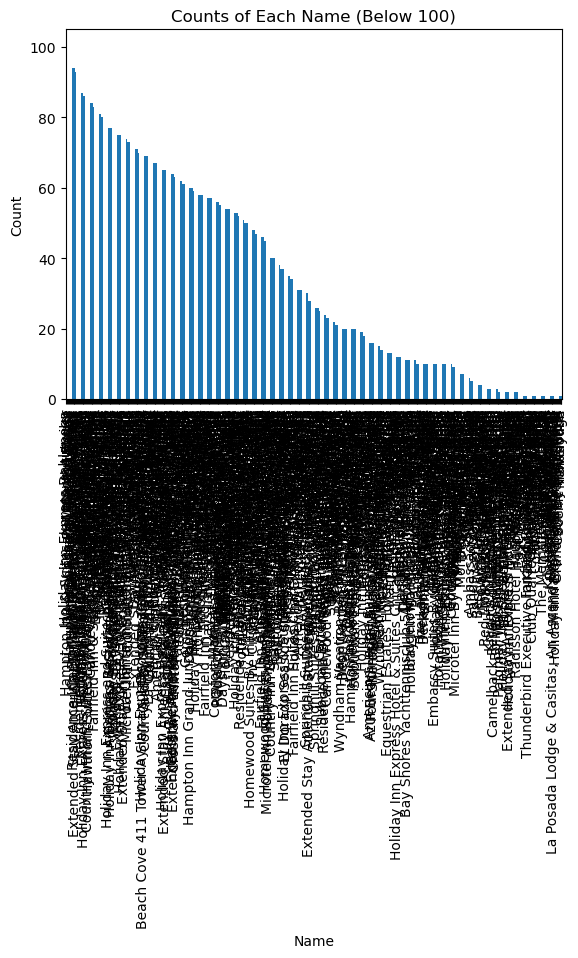

In [18]:
name_counts = df['name'].value_counts()
filtered_name_counts = name_counts[name_counts < 101]
# Plot the counts
filtered_name_counts.plot(kind='bar')
plt.xlabel('Name')
plt.ylabel('Count')
plt.title('Counts of Each Name (Below 100)')
plt.show()


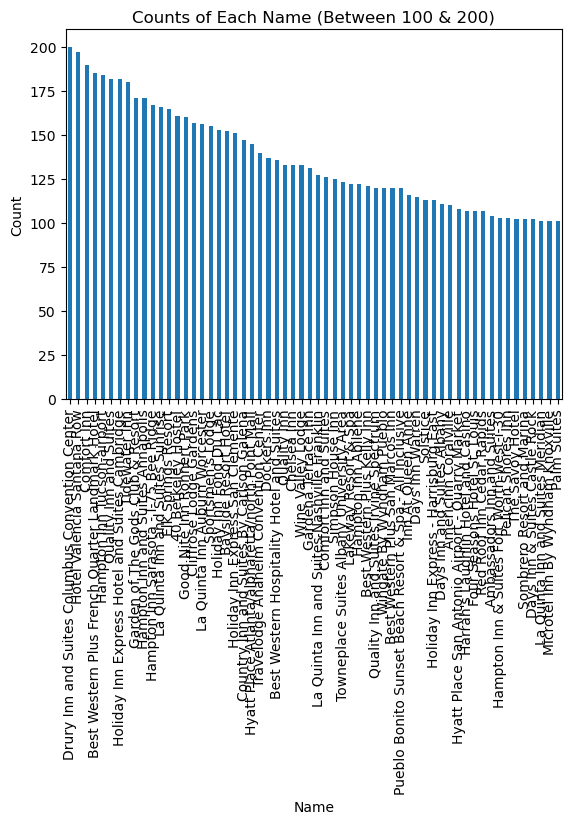

In [19]:
name_counts = df['name'].value_counts()
filtered_name_counts = name_counts[(name_counts < 201) & (name_counts > 100)]
# Plot the counts
filtered_name_counts.plot(kind='bar')
plt.xlabel('Name')
plt.ylabel('Count')
plt.title('Counts of Each Name (Between 100 & 200)')
plt.show()


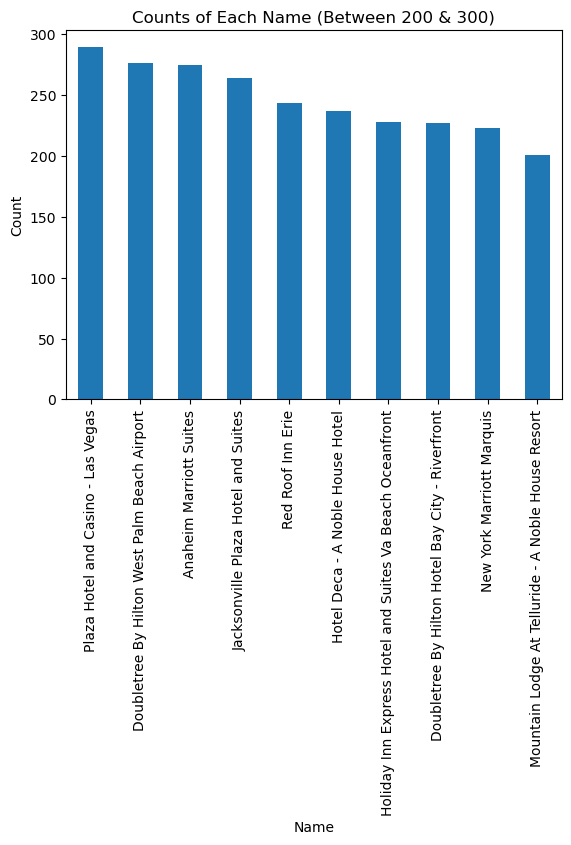

In [20]:
name_counts = df['name'].value_counts()
filtered_name_counts = name_counts[(name_counts < 301) & (name_counts > 200)]
# Plot the counts
filtered_name_counts.plot(kind='bar')
plt.xlabel('Name')
plt.ylabel('Count')
plt.title('Counts of Each Name (Between 200 & 300)')
plt.show()

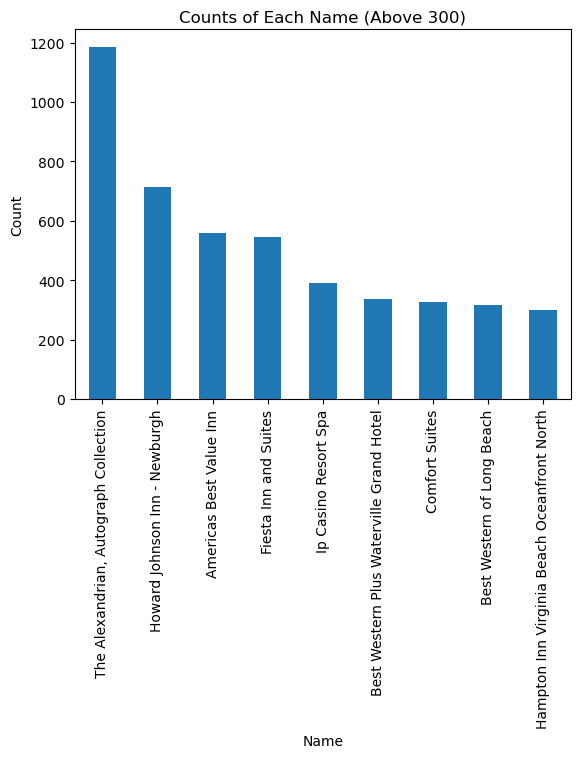

In [21]:
name_counts = df['name'].value_counts()
filtered_name_counts = name_counts[name_counts > 300]
# Plot the counts
filtered_name_counts.plot(kind='bar')
plt.xlabel('Name')
plt.ylabel('Count')
plt.title('Counts of Each Name (Above 300)')
plt.show()

# Data Preprocessing

In [22]:
from deep_translator import GoogleTranslator
from langdetect import detect
from nltk.tokenize import word_tokenize
from nltk.tokenize import sent_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
import nltk
import re

nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\selvi\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\selvi\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\selvi\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [23]:
#remove stop words (words that have no meaning in the sentence) from the text (e.g. the, is, at, which, on, for, this, etc.)
def remove_Stopwords(text):
    stop_words = set(stopwords.words("english"))
    words = word_tokenize(text)
    words = [word for word in words if word.lower() not in stop_words]
    return " ".join(words)

#change word back to its original form
def lemmatize_text(text):
    wordlist = []
    lemmatizer = WordNetLemmatizer()
    sentences = sent_tokenize(text)
    for sentence in sentences:
        words = word_tokenize(sentence)
        words = [lemmatizer.lemmatize(word) for word in words]
        wordlist.append(" ".join(words))
    return " ".join(wordlist)

#remove special characters and punctuations from the text
def clean_text(text):
    delete_dic = {sp_character: "" for sp_character in string.punctuation}
    delete_dic[" "] = " "
    table = str.maketrans(delete_dic)
    text1 = text.translate(table)
    textArr = text1.split()
    text2 = " ".join([word for word in textArr])
    return text2.lower()

def translate_to_english(text):
    try:
        # Check if the text is not in English
        if detect(text) != 'en':
            # Translate the text to English
            #type = detect(text)
            #print(type)
            translated_text = GoogleTranslator(source='auto', target='en').translate(text) 
            return translated_text
        else:
            #print("text in english")
            return text  # Return original text if already in English
    except Exception as e:
        print(f"Error occurred during translation: {e}")
        return None

In [29]:
df.head()

,name,ratings,reviews,username,sentiment
0,Hotel Russo Palace,4.0,Pleasant 10 min walk along the sea front to th...,Russ (kent),2
1,Hotel Russo Palace,5.0,Really lovely hotel. Stayed on the very top fl...,A Traveler,2
2,Hotel Russo Palace,5.0,Ett mycket bra hotell. Det som drog ner betyge...,Maud,2
3,Hotel Russo Palace,5.0,We stayed here for four nights in October. The...,Julie,2
4,Hotel Russo Palace,5.0,We stayed here for four nights in October. The...,sungchul,2


In [28]:
# Create masks for positive, negative, and neutral ratings
negative_mask = (df['ratings'] == 1.0) | (df['ratings'] == 2.0)
positive_mask = (df['ratings'] == 4.0) | (df['ratings'] == 5.0)
neutral_mask = (df['ratings'] == 3.0)

# Add a new column 'sentiment' to the DataFrame and assign values based on the masks
df.loc[neutral_mask,'sentiment'] = '1'  # Default all values to neutral
df.loc[negative_mask, 'sentiment'] = '0'
df.loc[positive_mask, 'sentiment'] = '2'

In [30]:
df.loc[:, 'reviews'] = df['reviews'].apply(translate_to_english)

Error occurred during translation: No features in text.
Error occurred during translation: No features in text.
Error occurred during translation: No features in text.
Error occurred during translation: No features in text.
Error occurred during translation: No features in text.
Error occurred during translation: No features in text.
Error occurred during translation: No features in text.
Error occurred during translation: No features in text.
Error occurred during translation: No features in text.
Error occurred during translation: No features in text.
Error occurred during translation: No features in text.
Error occurred during translation: No features in text.
Error occurred during translation: No features in text.
Error occurred during translation: No features in text.
Error occurred during translation: No features in text.
Error occurred during translation: No features in text.
Error occurred during translation: No features in text.
Error occurred during translation: No features i

C:\Users\selvi\AppData\Local\Temp\ipykernel_3508\2486452341.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[:, 'reviews'] = df['reviews'].apply(translate_to_english)


In [31]:
df.dropna(subset=['reviews'], inplace=True)
df.loc[:, 'reviews'] = df['reviews'].apply(clean_text)
df.loc[:, 'reviews'] = df['reviews'].apply(remove_Stopwords)
df.loc[:, 'reviews'] = df['reviews'].apply(lemmatize_text)

C:\Users\selvi\AppData\Local\Temp\ipykernel_3508\1850969425.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.dropna(subset=['reviews'], inplace=True)
C:\Users\selvi\AppData\Local\Temp\ipykernel_3508\1850969425.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[:, 'reviews'] = df['reviews'].apply(clean_text)
C:\Users\selvi\AppData\Local\Temp\ipykernel_3508\1850969425.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the document

In [37]:
print(df.isnull().sum())

name          0
ratings       0
reviews       0
username     43
sentiment     0
dtype: int64


In [34]:
df.dropna(subset=['reviews'], inplace=True)

C:\Users\selvi\AppData\Local\Temp\ipykernel_3508\3426038129.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.dropna(subset=['reviews'], inplace=True)


In [36]:
df['reviews'] = df['reviews'].str.strip()
df = df[(df['reviews'] != "") & (df['reviews'].notna())]

C:\Users\selvi\AppData\Local\Temp\ipykernel_3508\4204364399.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['reviews'] = df['reviews'].str.strip()


In [38]:
df.to_csv('hotel_review_data_cleaned.csv', index=False)